In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
titanic = sns.load_dataset("titanic")

In [5]:
titanic.head()
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# missing data
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

In [9]:
# encode
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

In [10]:
X = titanic[features]
y = titanic[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

In [12]:
X_train.head()

,pclass,sex,fare,embarked,age
445,1,1,81.8583,2,4.0
650,3,1,7.8958,2,28.0
172,3,0,11.1333,2,1.0
450,2,1,27.7500,2,36.0
314,2,1,26.2500,2,43.0


In [13]:
# Decision Tree Model - no pruning
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7761194029850746


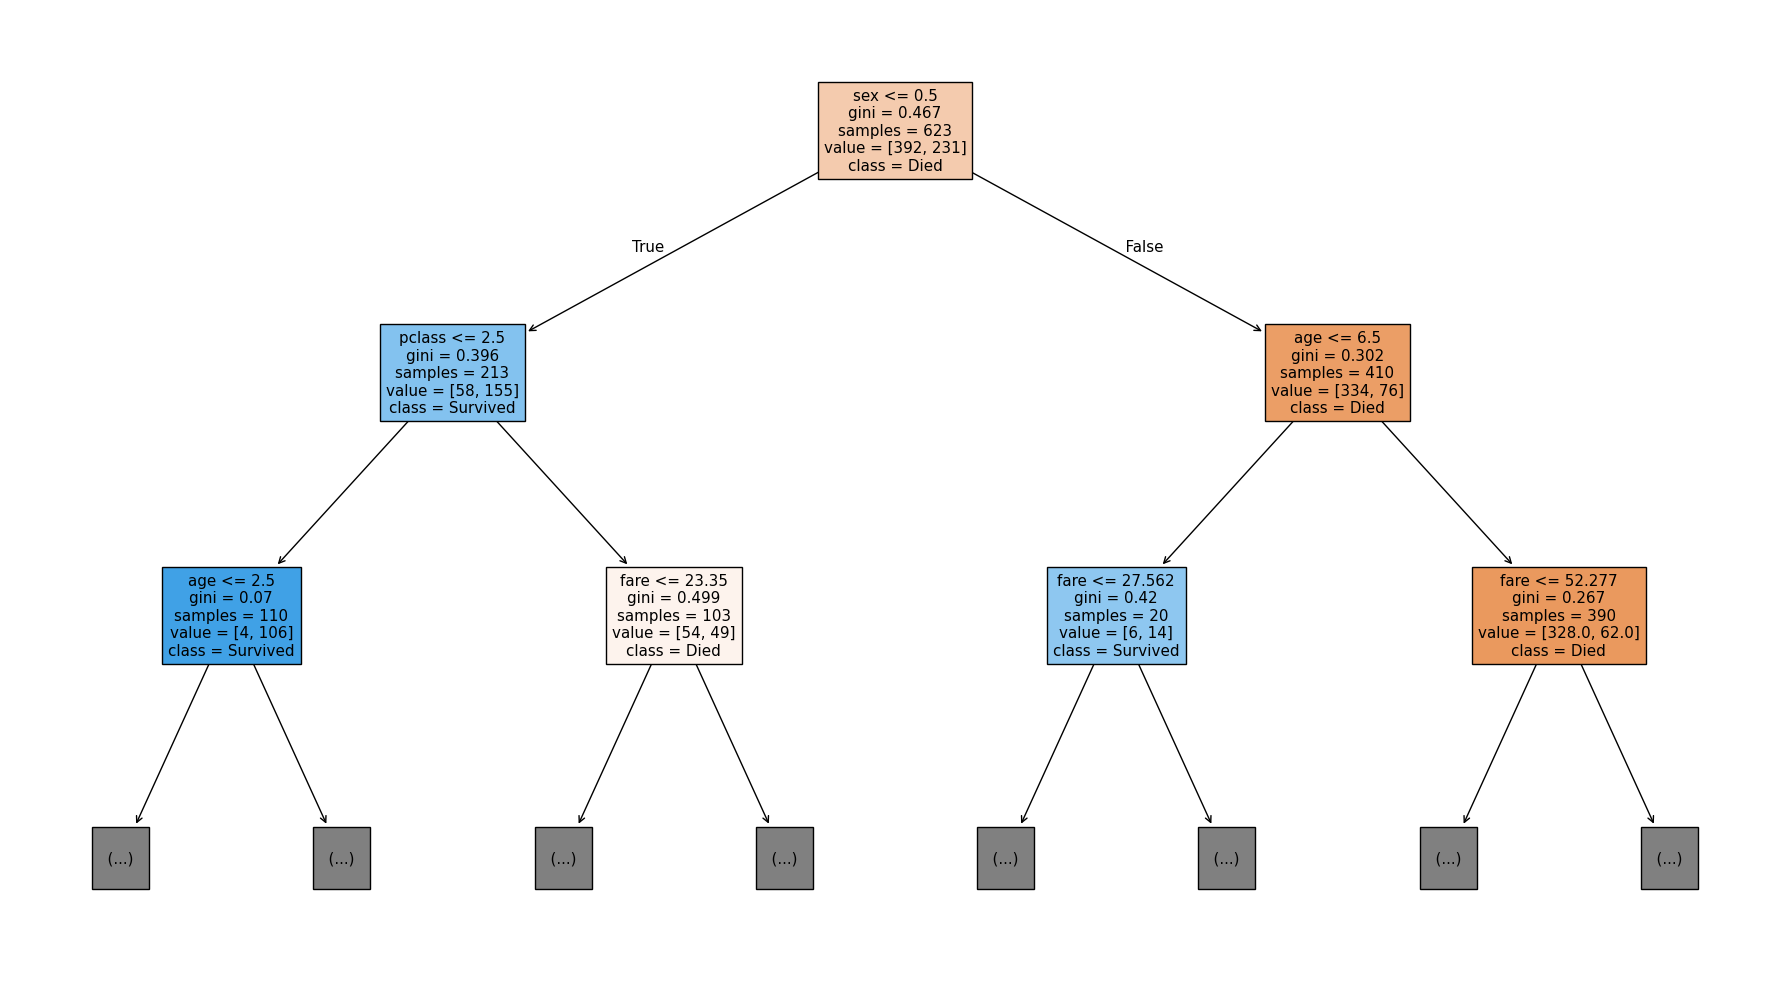

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    max_depth=2
)

plt.tight_layout()
plt.show()

Decision Tree with pre-pruning


for depth=2, accuracy=0.7723880597014925
for depth=3, accuracy=0.8059701492537313
for depth=4, accuracy=0.8246268656716418


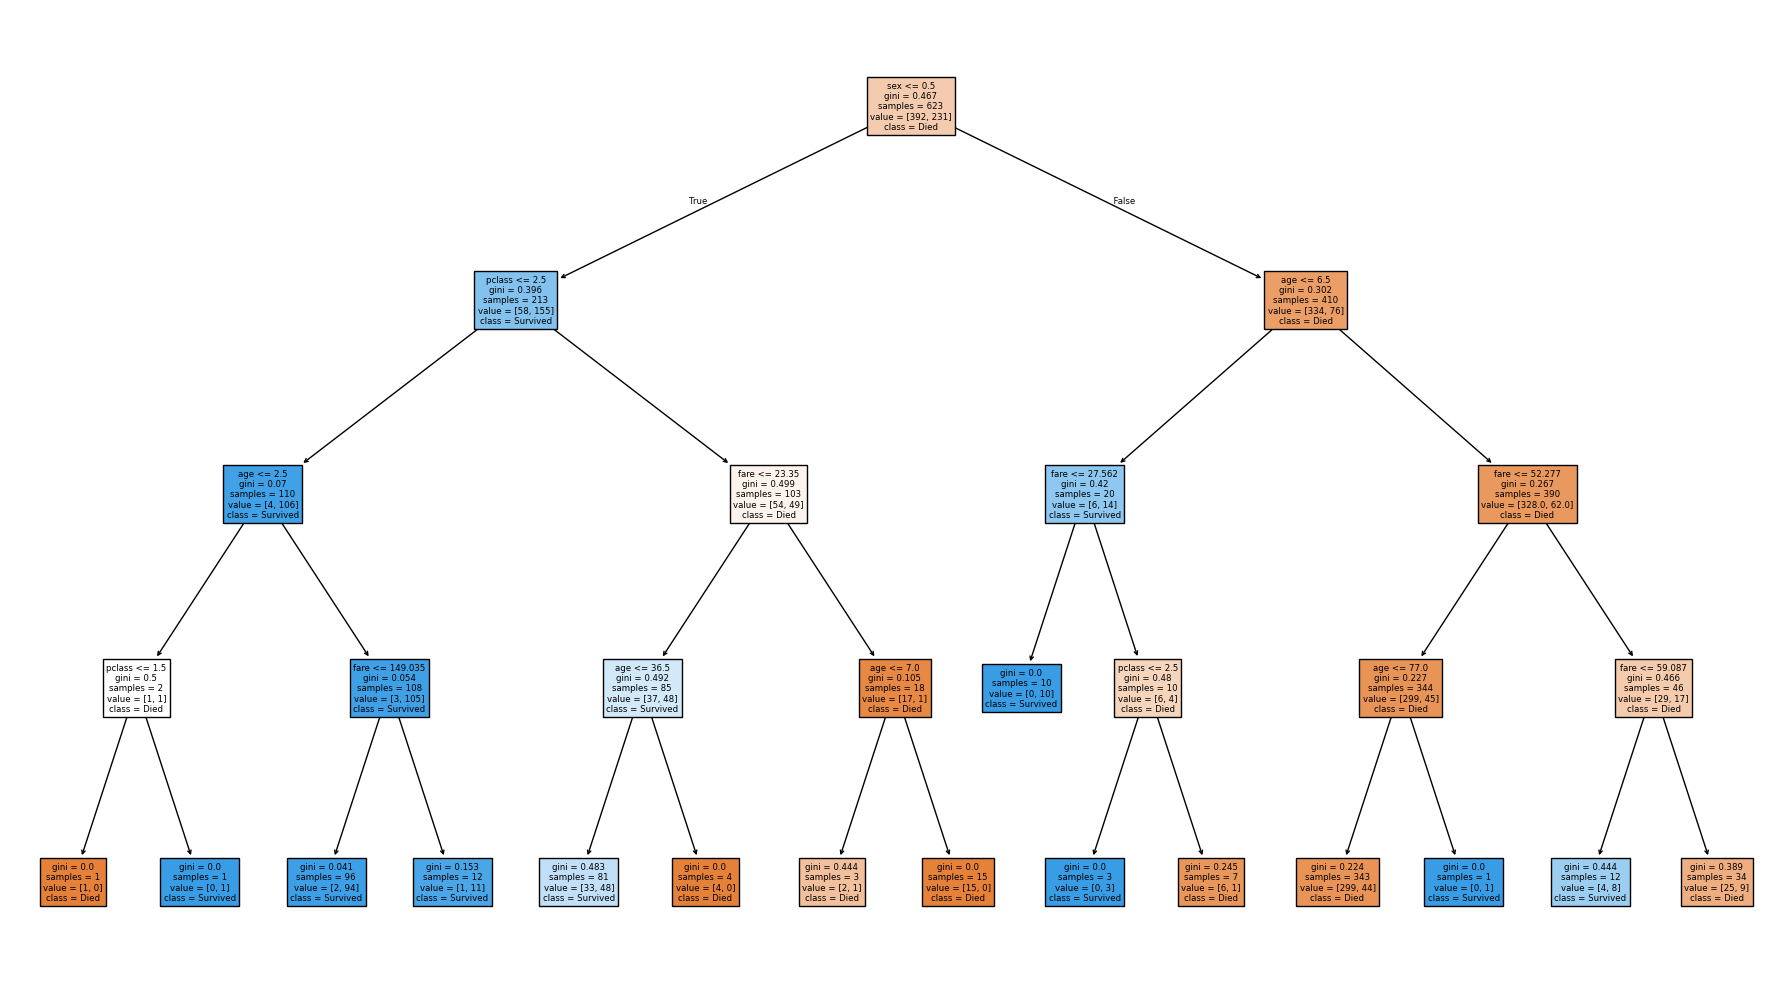

for depth=5, accuracy=0.7985074626865671
for depth=6, accuracy=0.7873134328358209
for depth=7, accuracy=0.7761194029850746
for depth=8, accuracy=0.8022388059701493
for depth=9, accuracy=0.7686567164179104
for depth=10, accuracy=0.7798507462686567


In [19]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for depth={depth}, accuracy={acc}")

    if depth==4:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()


for sample split=5, accuracy=0.8246268656716418
for sample split=10, accuracy=0.8246268656716418


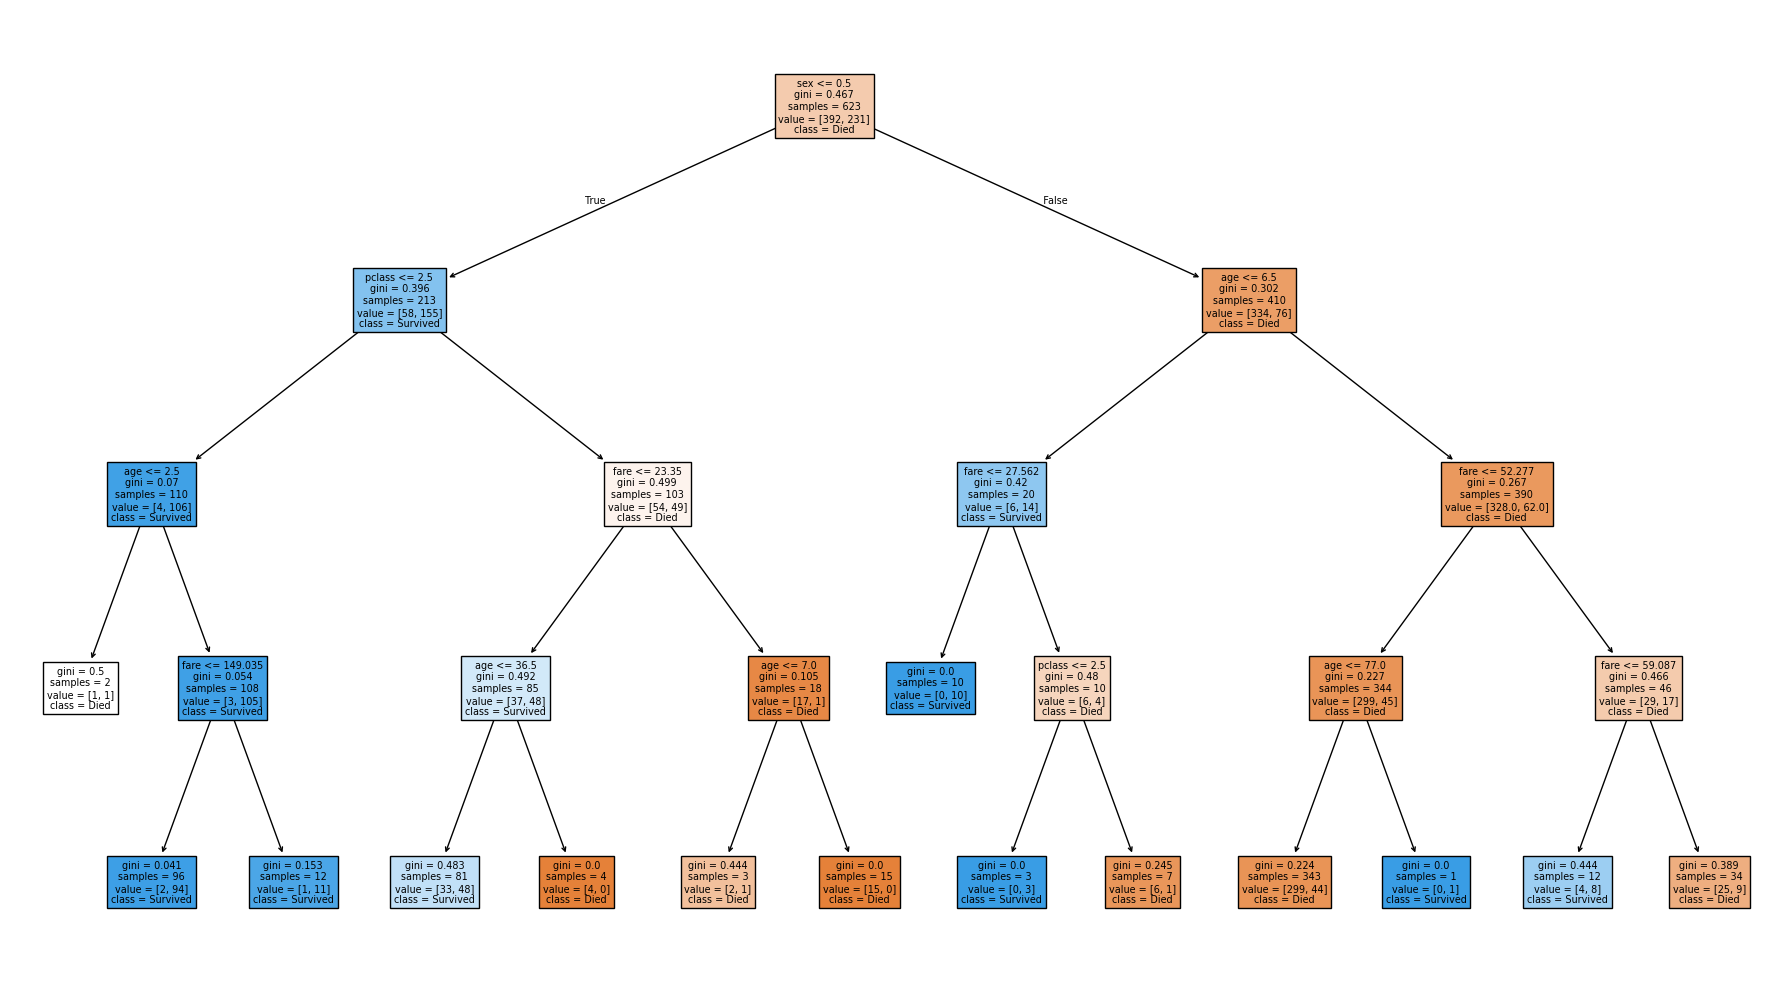

for sample split=15, accuracy=0.8171641791044776
for sample split=20, accuracy=0.8171641791044776
for sample split=25, accuracy=0.8208955223880597
for sample split=30, accuracy=0.8208955223880597


In [20]:
min_samples_splits = [5, 10, 15, 20, 25, 30]

for split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=4, min_samples_split=split)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for sample split={split}, accuracy={acc}")

    if split==10:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

Decision tree with post-pruning


In [21]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.         0.         0.00013376 0.00013376 0.00022931 0.00032103
 0.00048409 0.00053505 0.00053505 0.00053505 0.00062746 0.00064205
 0.00077709 0.00085607 0.00093633 0.00096308 0.00096308 0.00096308
 0.00099875 0.00101659 0.00104193 0.0010478  0.00107009 0.00109238
 0.00115927 0.0012352  0.00123729 0.00129646 0.00132211 0.00133563
 0.00137583 0.00137583 0.00139708 0.00143228 0.00144145 0.00150482
 0.00151596 0.00152184 0.00171215 0.00183444 0.0019012  0.00195674
 0.00200642 0.00214018 0.00233474 0.0024077  0.00260835 0.00263292
 0.00278606 0.00280169 0.00284379 0.00288925 0.00299625 0.00302412
 0.00431144 0.00495299 0.00577849 0.00589431 0.0074248  0.01236198
 0.01787674 0.04065074 0.1323581 ]


In [23]:
# train our model for all alphas

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [24]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [25]:
best_acc

0.8208955223880597

In [26]:
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=4)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0017121455323702516), max_depth=4)

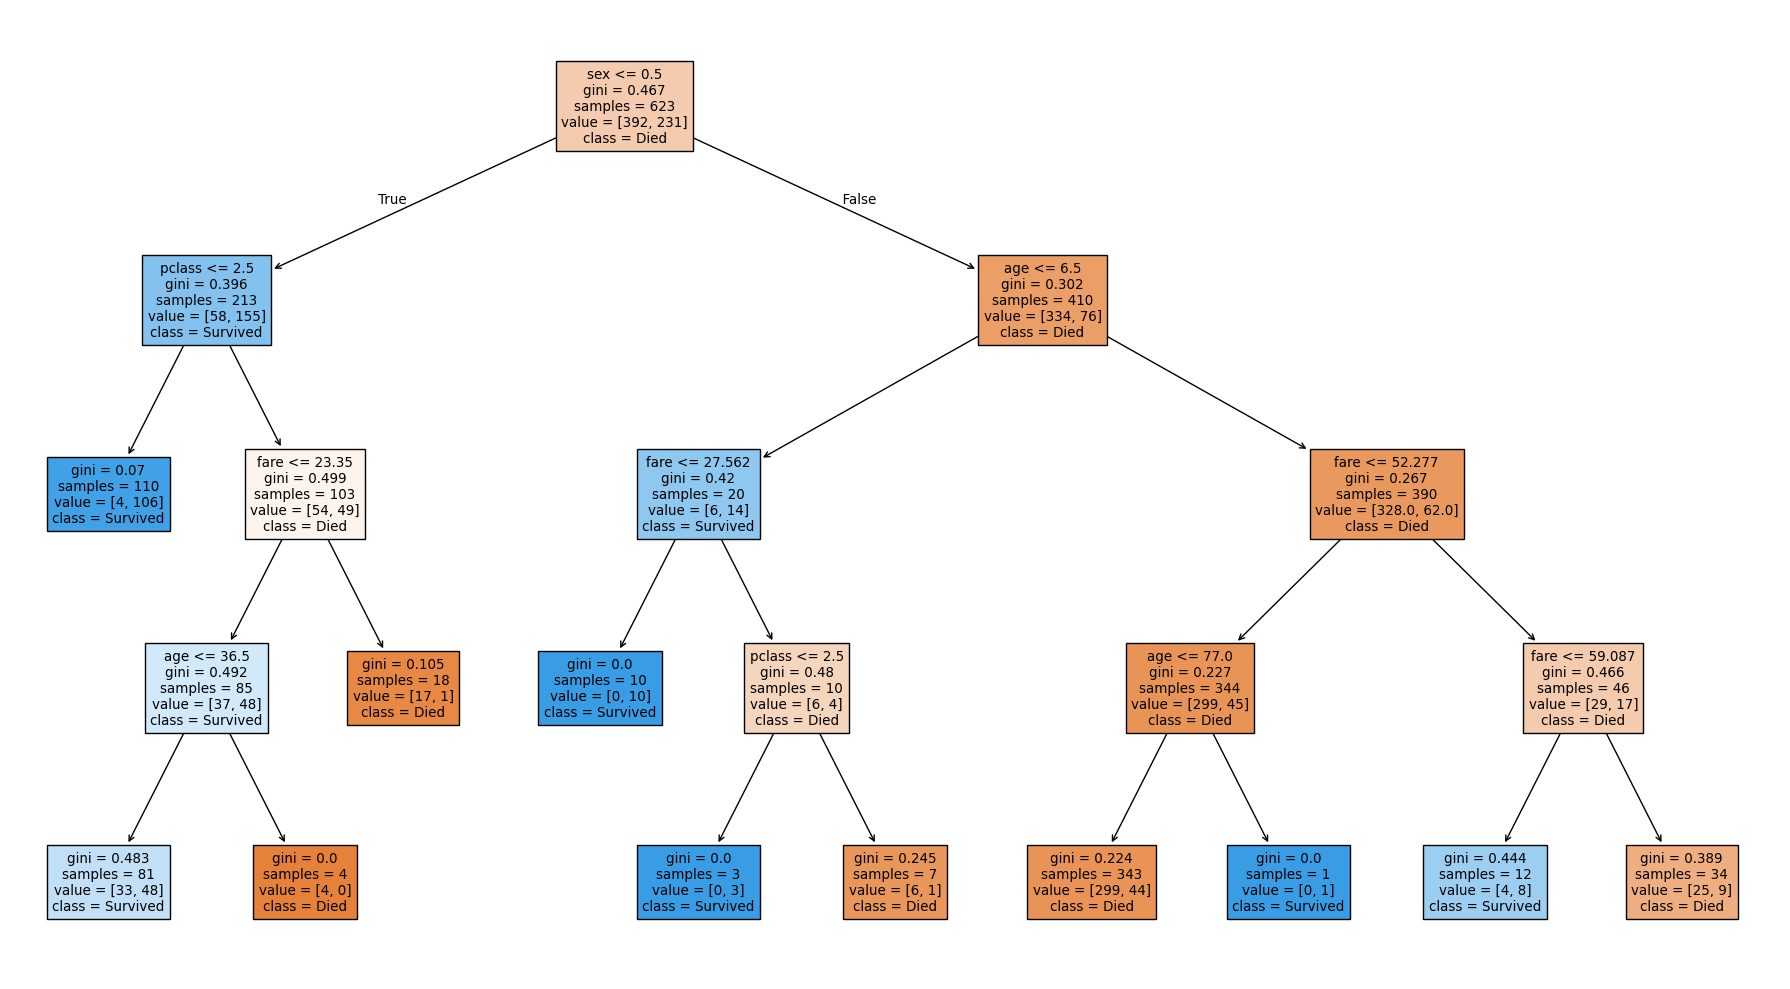

In [27]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)
        
plt.tight_layout()
plt.show()

In [28]:
print(best_model.score(X_test, y_test))

0.8246268656716418
